<a href="https://colab.research.google.com/github/hohaithuy/AI-Pacman-CS106/blob/main/CS106_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import gym
import numpy as np
import random
import time

In [26]:
env = gym.make('FrozenLake-v0')

# Set up environment

In [27]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100

In [28]:
def play(env, q_table, render=False):
    state = env.reset()
    total_reward = 0
    steps = 0
    done = False
    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            env.render()
            time.sleep(0.2)
            if not done:
                display.clear_output(wait=True)
        state = next_state

    return (total_reward, steps)

In [29]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

# Q-Learning

In [30]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [31]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, done, info = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

### TEST

In [32]:
np.random.seed(1)
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [33]:
q_table

array([[0.59741781, 0.47423443, 0.48888958, 0.46623275],
       [0.29756348, 0.21362483, 0.23919755, 0.44840345],
       [0.37056518, 0.24259265, 0.27894393, 0.29779193],
       [0.12135228, 0.00471474, 0.0019311 , 0.00151173],
       [0.61409378, 0.35208121, 0.33396581, 0.24781456],
       [0.        , 0.        , 0.        , 0.        ],
       [0.20431764, 0.16922888, 0.14419072, 0.09275124],
       [0.        , 0.        , 0.        , 0.        ],
       [0.41314414, 0.44657105, 0.29801698, 0.64890379],
       [0.51410967, 0.70199298, 0.46218089, 0.38975667],
       [0.61602622, 0.4347925 , 0.28480046, 0.29232652],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.46423618, 0.65685718, 0.8159611 , 0.47736315],
       [0.77060607, 0.93908761, 0.7419307 , 0.75562695],
       [0.        , 0.        , 0.        , 0.        ]])

In [34]:
print(sum(rewards_all))
print(sum(rewards_all[0:1000]))
print(sum(rewards_all[1000:2000]))
print(sum(rewards_all[2000:3000]))
print(sum(rewards_all[9000:10000]))
print(sum(rewards_all[11000:12000]))
print(sum(rewards_all[14000:15000]))
print(sum(rewards_all[19000:]))

12788.0
123.0
553.0
629.0
662.0
674.0
658.0
650.0


In [35]:
play_multiple_times(env, q_table, 1000)

Number of successes: 757/1000
Average number of steps: 37.513870541611624


# SARSA

In [36]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [37]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)

        exploration = random.uniform(0,1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        for step in range(num_steps_per_episode):

            next_state, reward, done, info = env.step(action)

            exploration = random.uniform(0,1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])


            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[next_state, next_action])

            reward_episode += reward
            state = next_state
            action = next_action

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

### TEST

In [38]:
np.random.seed(1)
q_table, rewards_all = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [39]:
q_table

array([[5.36544872e-01, 4.75805416e-01, 4.79128783e-01, 4.77086667e-01],
       [2.57337021e-01, 1.97656642e-01, 1.98271284e-01, 4.32334476e-01],
       [3.12831558e-01, 2.62301467e-01, 2.48964345e-01, 2.57359284e-01],
       [2.01582336e-01, 7.06600625e-03, 3.89108725e-04, 1.18781695e-02],
       [5.42271305e-01, 4.58313552e-01, 2.74033323e-01, 3.15704984e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.43057318e-01, 1.80591216e-01, 1.78609699e-01, 6.66792522e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.37767895e-01, 3.18980627e-01, 3.91460219e-01, 5.45955474e-01],
       [4.40664667e-01, 5.76772114e-01, 4.27477735e-01, 3.42710582e-01],
       [5.00208796e-01, 3.82410477e-01, 2.40352725e-01, 3.14554483e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.09568105e-01, 6.29035434e-01, 7.62016124e

In [40]:
print(sum(rewards_all))
print(sum(rewards_all[0:1000]))
print(sum(rewards_all[1000:2000]))
print(sum(rewards_all[2000:3000]))
print(sum(rewards_all[9000:10000]))
print(sum(rewards_all[11000:12000]))
print(sum(rewards_all[14000:15000]))
print(sum(rewards_all[19000:]))


13053.0
252.0
576.0
680.0
667.0
664.0
703.0
700.0


# Compare Model

### FrozenLake-v0

In [41]:
env = gym.make('FrozenLake-v0')
# for i in range(10):
i = 0
np.random.seed(i)
q_table_1, rewards_all_1 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
np.random.seed(i)
q_table_2, rewards_all_2 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)


x = [i for i in range(0, 20000, 1000)]
y_q_learning = [sum(rewards_all_1[i: i+1000]) for i in range(0, 20000, 1000)]
y_sarsa = [sum(rewards_all_2[i: i+1000]) for i in range(0, 20000, 1000)]



Episode 19999 finished
Episode 19999 finished


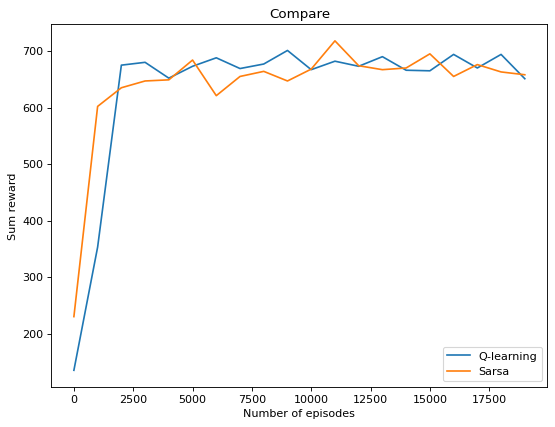

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=80)
plt.title(f"Compare on FrozenLake-v0")
plt.xlabel("Number of episodes")
plt.ylabel("Sum reward each 1000 episodes")
# plt.ylim(0, max plt.ticklabel_format(style='sci', axis='y', scilimits=(1,100))
plt.plot(x, y_q_learning, label = "Q-learning")
# plt.fill_between(y_DE, x + error_bar_DE, x_DE - error_bar_DE, alpha=0.3)
plt.plot(x, y_sarsa, label = "Sarsa")
# plt.fill_between(y_ES, x_ES + error_bar_ES, x_ES - error_bar_ES, alpha=0.3)
plt.legend()
plt.show()

### FrozenLake8x8-v0

In [72]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.0002

num_episodes = 1000000
num_steps_per_episode = 300

In [73]:
env = gym.make('FrozenLake8x8-v0')
# for i in range(10):
i = 0
np.random.seed(i)
q_table_1, rewards_all_1 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
np.random.seed(i)
q_table_2, rewards_all_2 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)


x = [i for i in range(0, num_episodes, 1000)]
y_q_learning = [sum(rewards_all_1[i: i+1000]) for i in range(0, num_episodes, 1000)]
y_sarsa = [sum(rewards_all_2[i: i+1000]) for i in range(0, num_episodes, 1000)]



Episode 999999 finished
Episode 999999 finished


In [74]:
q_table_2

array([[0.3634802 , 0.37810651, 0.36367668, 0.36136756],
       [0.37026789, 0.3666014 , 0.39581611, 0.36803527],
       [0.39262245, 0.39233704, 0.41532297, 0.39078189],
       [0.40663941, 0.41910194, 0.43807902, 0.40365806],
       [0.43243904, 0.43202214, 0.46797304, 0.42973809],
       [0.45621632, 0.46752217, 0.49098225, 0.45288601],
       [0.47791573, 0.47951259, 0.5064853 , 0.48109913],
       [0.48579945, 0.47212707, 0.51611148, 0.47393555],
       [0.35195513, 0.35795432, 0.36069234, 0.37521378],
       [0.35962875, 0.364305  , 0.3635943 , 0.37964324],
       [0.36080461, 0.36819227, 0.35885759, 0.40699333],
       [0.31950293, 0.24714918, 0.29169124, 0.42966165],
       [0.41906921, 0.41478609, 0.41612008, 0.45694579],
       [0.44712323, 0.45511962, 0.45726381, 0.48423105],
       [0.48335333, 0.47982118, 0.51536466, 0.48856058],
       [0.49937009, 0.52710308, 0.51149971, 0.50821456],
       [0.32325091, 0.32248448, 0.32227711, 0.36205406],
       [0.31287595, 0.31273792,

In [75]:
q_table_1

array([[0.37099517, 0.37153374, 0.38358575, 0.36998471],
       [0.36988218, 0.38081933, 0.39968955, 0.38182305],
       [0.3931404 , 0.40106541, 0.40475286, 0.3963573 ],
       [0.41449413, 0.41109316, 0.42768782, 0.41508281],
       [0.43338527, 0.44169553, 0.45245174, 0.44383338],
       [0.45053763, 0.45380027, 0.48310234, 0.45938462],
       [0.48256151, 0.48843825, 0.49160713, 0.48214747],
       [0.49591751, 0.48562945, 0.4886903 , 0.48618463],
       [0.36873961, 0.36271752, 0.36861174, 0.37791381],
       [0.36756651, 0.3755865 , 0.36984567, 0.38812198],
       [0.36527312, 0.37478285, 0.36876219, 0.39876177],
       [0.32027009, 0.28721386, 0.24080032, 0.41580479],
       [0.40639934, 0.39956573, 0.415419  , 0.43513342],
       [0.44627545, 0.45876354, 0.48161983, 0.44707153],
       [0.48782907, 0.48945016, 0.50210797, 0.49146155],
       [0.50024914, 0.50589556, 0.51120485, 0.49739063],
       [0.33128383, 0.32954958, 0.33159164, 0.36015987],
       [0.31788299, 0.31893914,

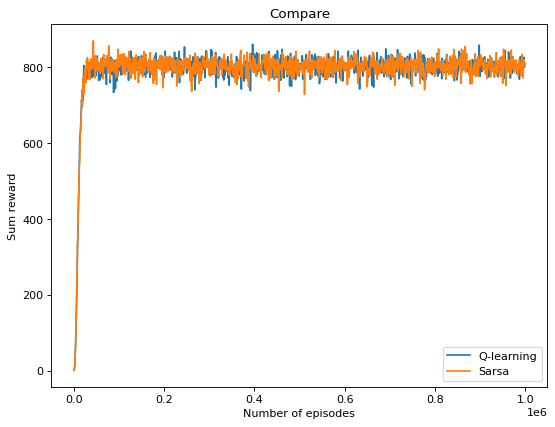

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=80)
plt.title(f"Compare")
plt.xlabel("Number of episodes")
plt.ylabel("Sum reward")
# plt.ylim(0, max plt.ticklabel_format(style='sci', axis='y', scilimits=(1,100))
plt.plot(x, y_q_learning, label = "Q-learning")
# plt.fill_between(y_DE, x + error_bar_DE, x_DE - error_bar_DE, alpha=0.3)
plt.plot(x, y_sarsa, label = "Sarsa")
# plt.fill_between(y_ES, x_ES + error_bar_ES, x_ES - error_bar_ES, alpha=0.3)
plt.legend()
plt.show()

### Taxi-v3

In [60]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100

In [61]:
env = gym.make('Taxi-v3')
# for i in range(10):
i = 0
np.random.seed(i)
q_table_1, rewards_all_1 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
np.random.seed(i)
q_table_2, rewards_all_2 = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)


x = [i for i in range(0, num_episodes, 1000)]
y_q_learning = [sum(rewards_all_1[i: i+1000]) for i in range(0, num_episodes, 1000)]
y_sarsa = [sum(rewards_all_2[i: i+1000]) for i in range(0, num_episodes, 1000)]



Episode 19999 finished
Episode 19999 finished


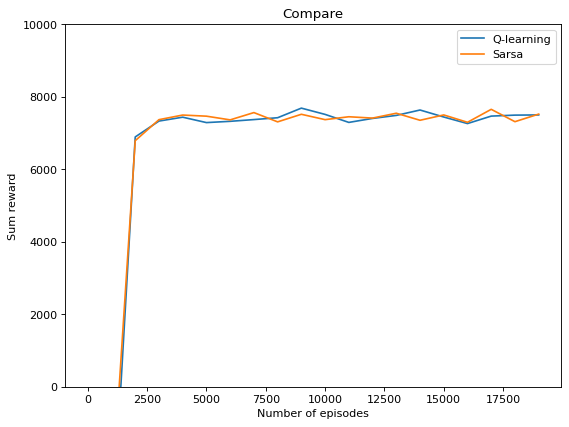

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=80)
plt.title(f"Compare")
plt.xlabel("Number of episodes")
plt.ylabel("Sum reward")
plt.ylim((0, 10000)) 
plt.plot(x, y_q_learning, label = "Q-learning")
# plt.fill_between(y_DE, x + error_bar_DE, x_DE - error_bar_DE, alpha=0.3)
plt.plot(x, y_sarsa, label = "Sarsa")
# plt.fill_between(y_ES, x_ES + error_bar_ES, x_ES - error_bar_ES, alpha=0.3)
plt.legend()
plt.show()

# Nhận xét
- Về cách triển khai:
  + Cả hai cách tiếp cận đều hoạt động trong một môi trường hữu hạn.
  + Q-Learning và SARSA đều lưu trữ reward của trạng thái hiện tại và hành động tương ứng để cập nhật trong tương lai. Tuy nhiên,Q-Learning trực tiếp tìm kiếm chính sách tối ưu trong khi SARSA tìm kiếm chính sách tối ưu “gần”. Q-Learning là một tác nhân tích cực hơn, trong khi SARSA tỏ ra thận trọng hơn. Một ví dụ là đi bộ gần vách đá. QL sẽ đi con đường ngắn nhất vì nó là tối ưu (với nguy cơ bị ngã), trong khi SARSA sẽ đi con đường dài hơn, an toàn hơn (để tránh bị ngã bất ngờ.
- Về thực nghiệm:
  + Q-Learning cho thấy khả năng hội tụ nhanh hơn so với Sarsa.
  + Cả 2 bài toán đều có thể tìm ra được lời giải cho cả 3 môi trường.
  + Tuy nhiên, khi kích thước bài lớn ta cần mở rộng trạng thái ngẫu nhiên để từ đó agent có thể khám phá được lời giải cho bài toán.